In [18]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

In [2]:
model = pickle.load(open('logistic_regression_completion.p', 'rb')) # load the model

In [3]:
# model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=200, multi_class='warn',
#           n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
#           tol=0.0001, verbose=0, warm_start='False')

In [4]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)


In [5]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/X_test.csv')

y_test = pd.read_csv('../data/processed/y_test.csv')
y_test = y_test['module_not_completed']

numeric_cols = ['num_of_prev_attempts', 'studied_credits',
'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day',
'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early', 'days_early_first_assessment',
'score_first_assessment']

# fill and scale
X_train.fillna(value = 0, inplace = True)
X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)
X_test = scale_subset(X_test, numeric_cols)



/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [6]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start='False')

In [7]:
predictions = model.predict(X_test)

In [8]:
recall = recall_score(y_test, predictions)
recall

0.8367168358417921

In [9]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8483148880435712

In [10]:
probas = model.predict_proba(X_test)[:, :1]
tprs, fprs, thresh = roc_curve(y_test, probas)

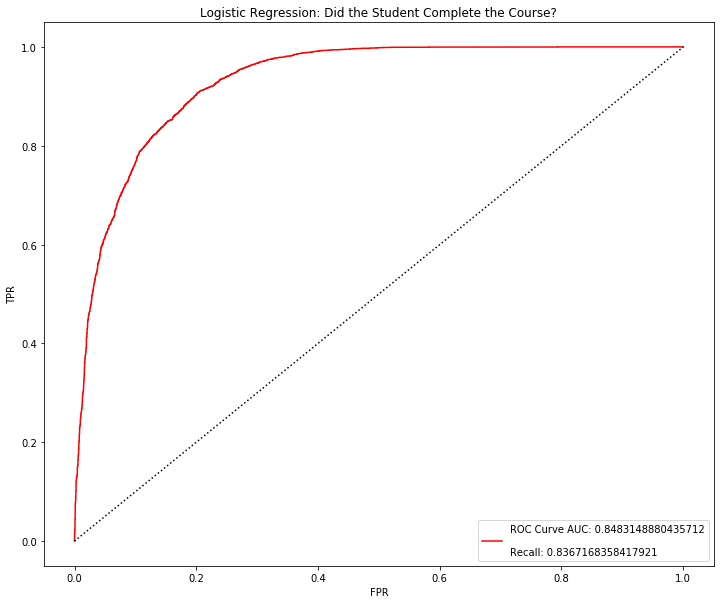

In [11]:
plt.figure(figsize=(12,10))
plt.plot(fprs, tprs, 
    label='ROC Curve AUC: {}\n\nRecall: {}'.format(roc_auc, recall),
    color='red')
plt.plot([0,1],[0,1], 'k:')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression: Did the Student Complete the Course?")
plt.show()

In [12]:
# pd.DataFrame(data={'frps': fprs, 'tprs': tprs, 'Thresholds': thresh})

# Which features are most important?

In [ ]:
sm.stats.outliers_influence.va

In [13]:
abs_coef = list(np.abs(model.coef_.ravel()))
features = list(X_test.columns)

In [14]:
coef_dict = c.OrderedDict((zip(abs_coef, features)))

In [15]:
sorted(coef_dict.items(), reverse=True)

[(2.699659506772256, 'pct_days_vle_accessed'),
 (2.460294460774313, 'code_module_FFF'),
 (1.966230708493373, 'avg_score'),
 (1.2088242577561603, 'code_module_CCC'),
 (1.1409490968514577, 'code_module_DDD'),
 (1.0456483310176563, 'days_early_first_assessment'),
 (1.03756528369088, 'code_presentation_2014J'),
 (0.8932116523237199, 'avg_days_sub_early'),
 (0.8770082394864068, 'code_presentation_2013J'),
 (0.7267114106971799, 'age_band_55<='),
 (0.6899391264826976, 'code_module_EEE'),
 (0.6860362582742039, 'code_presentation_2014B'),
 (0.682001979226202, 'imd_band_nan'),
 (0.6816394383272958, 'clicks_per_day'),
 (0.5806803610331229, 'highest_education_No Formal quals'),
 (0.570569629303721, 'highest_education_Lower Than A Level'),
 (0.4835017812574342, 'imd_band_90-100%'),
 (0.40088635606909223, 'age_band_35-55'),
 (0.38969639181780663, 'imd_band_80-90%'),
 (0.3377184544462005, 'imd_band_60-70%'),
 (0.3362268075705257, 'imd_band_30-40%'),
 (0.32953043830039963, 'region_North Region'),
 (0.

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.82      0.86      0.84      5054
        True       0.87      0.84      0.85      5714

   micro avg       0.85      0.85      0.85     10768
   macro avg       0.85      0.85      0.85     10768
weighted avg       0.85      0.85      0.85     10768



In [ ]:
# pickle.dump(model, open('logistic_regression_completion.p', 'wb')) # pickle the model

In [7]:
c = X_train.corr().abs()

In [9]:
s = c.unstack()

In [13]:
so = s.sort_values(kind="quicksort", ascending=False)

In [17]:
so[::2]

disability_Y                                   disability_Y                                     1.000000
region_South East Region                       region_South East Region                         1.000000
region_South West Region                       region_South West Region                         1.000000
region_West Midlands Region                    region_West Midlands Region                      1.000000
highest_education_HE Qualification             highest_education_HE Qualification               1.000000
highest_education_No Formal quals              highest_education_No Formal quals                1.000000
region_North Region                            region_North Region                              1.000000
imd_band_30-40%                                imd_band_30-40%                                  1.000000
imd_band_50-60%                                imd_band_50-60%                                  1.000000
imd_band_70-80%                                imd_band